In [1]:
import sys
sys.path.append('components')

from components.data_loader import *
from components.models import *
from components.model_trainer import *
from utils import *

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import warnings
import time

# **Reconstruction AutoEncoder**

### **Data loading**

In [2]:
train = AutoEncoderDataset(type_data="train")
val = AutoEncoderDataset(type_data="val")
test = AutoEncoderDataset(type_data="test")

train_loader = DataLoader(train, batch_size=100, shuffle=True)
val_loader = DataLoader(val, batch_size=100, shuffle=True)
test_loader = DataLoader(test, batch_size=100, shuffle=True)

### **Hyperparameters**

In [3]:
autoencoder = AutoEncoder()
autoencoder_optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)

training_parameters = {
    "model": autoencoder,
    "train_loader": train_loader,
    "val_loader": val_loader,
    "criterion": nn.MSELoss(),
    "optimizer": autoencoder_optimizer,
    "lr_scheduler": optim.lr_scheduler.ReduceLROnPlateau(autoencoder_optimizer, mode='min', factor=0.1, patience=3, min_lr=0.000001),
    "device": "cuda" if torch.cuda.is_available() else "cpu",
}

### **Training**

In [4]:
# Really long training process
import time
import warnings

EPOCHS = 40

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    autoencoder_trainer = ModelTrainer(**training_parameters)
    
    start = time.time()
    autoencoder_trainer.fit(EPOCHS)
    end = time.time()
    
    training_time_hours = (end - start) / 3600
    print(f"Training took {training_time_hours:.2f} hours")


Epoch 1/40
------------------------------
Training Loss: 0.1410
Validation Loss: 0.1051
Model saved with improved validation loss: 0.1051

Epoch 2/40
------------------------------
Training Loss: 0.0974
Validation Loss: 0.0889
Model saved with improved validation loss: 0.0889

Epoch 3/40
------------------------------
Training Loss: 0.0854
Validation Loss: 0.0763
Model saved with improved validation loss: 0.0763

Epoch 4/40
------------------------------
Training Loss: 0.0776
Validation Loss: 0.0679
Model saved with improved validation loss: 0.0679

Epoch 5/40
------------------------------
Training Loss: 0.0730
Validation Loss: 0.0630
Model saved with improved validation loss: 0.0630

Epoch 6/40
------------------------------
Training Loss: 0.0690
Validation Loss: 0.0663

Epoch 7/40
------------------------------
Training Loss: 0.0654
Validation Loss: 0.0550
Model saved with improved validation loss: 0.0550

Epoch 8/40
------------------------------
Training Loss: 0.0626
Validation L

### **Visualisations and feedback on training**

##### A closer look on training loss 

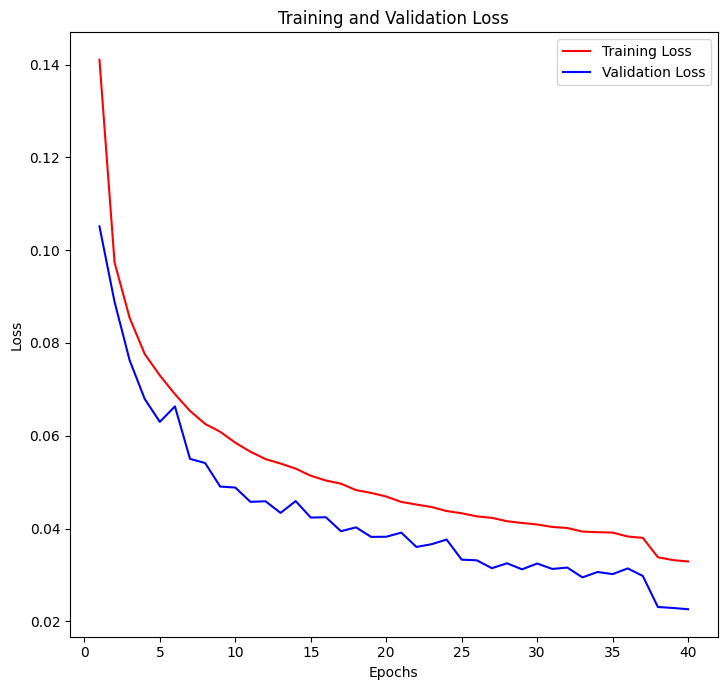

In [5]:
autoencoder_trainer.plot_training_history()

Here we can see that 

##### A simple visualisation to see a few example of the reconstruction

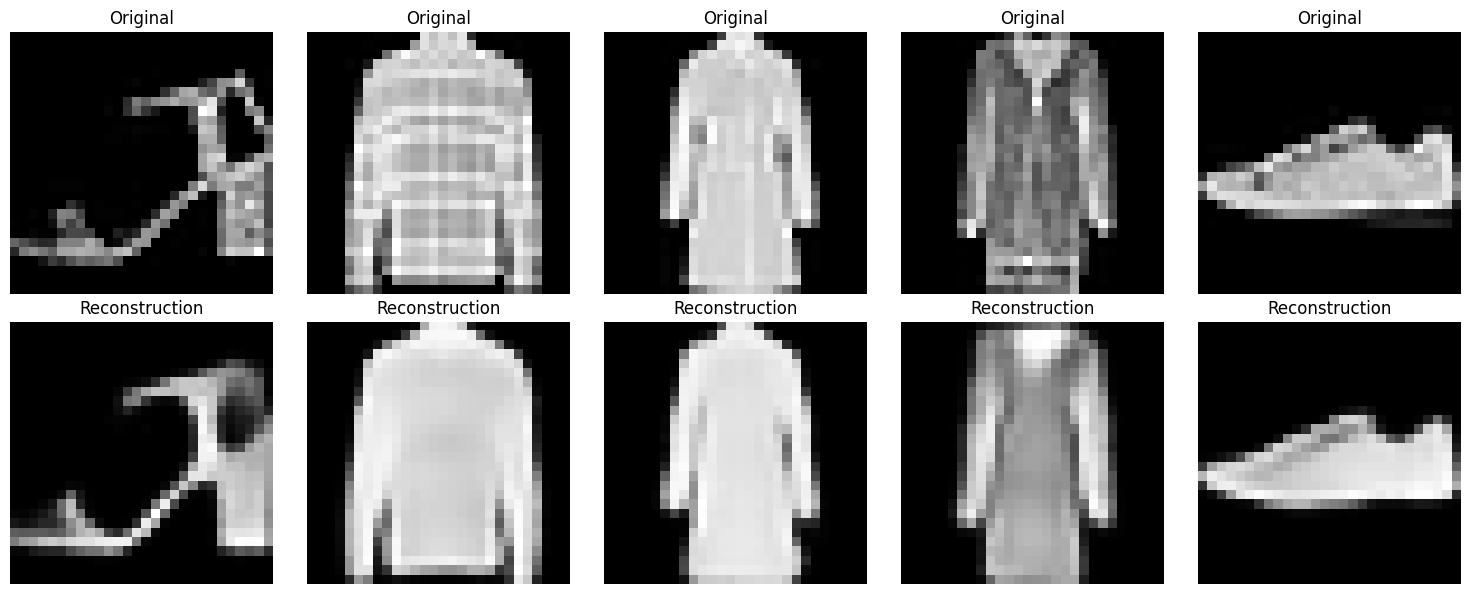

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    visualise_reconstruction(autoencoder, test_loader)

-----------------------------
-----------------------------

# **Classifier**

### **Data Loading**

In [7]:
train = ClassifierDataset(type_data="train")
val = ClassifierDataset(type_data="val")
test = ClassifierDataset(type_data="test")

train_loader = DataLoader(train, batch_size=100, shuffle=True)
val_loader = DataLoader(val, batch_size=100, shuffle=True)
test_loader = DataLoader(test, batch_size=100, shuffle=True)

### **Hyperparameters**

In [8]:
classifier = Classifier(autoencoder, 10)
classifier_optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)

training_parameters = {
    "model": classifier,
    "train_loader": train_loader,
    "val_loader": val_loader,
    "criterion": nn.CrossEntropyLoss(),
    "optimizer": classifier_optimizer,
    "lr_scheduler": optim.lr_scheduler.ReduceLROnPlateau(autoencoder_optimizer, mode='min', factor=0.1, patience=3, min_lr=0.000001),
    "device": "cuda" if torch.cuda.is_available() else "cpu",
}

### **Training**

In [13]:
# Kept the epochs low by time constraints
EPOCHS = 100

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    classifier_trainer = ModelTrainer(**training_parameters)
    
    start = time.time()
    classifier_trainer.fit(EPOCHS)
    end = time.time()
    
    training_time_hours = (end - start) / 3600
    print(f"Training took {training_time_hours:.2f} hours")


Epoch 1/100
------------------------------
Training Loss: 1.7935, Training Accuracy: 42.92%
Validation Loss: 1.1558, Validation Accuracy: 64.99%
Model saved with improved validation loss: 1.1558

Epoch 2/100
------------------------------
Training Loss: 1.0466, Training Accuracy: 64.02%
Validation Loss: 0.7805, Validation Accuracy: 71.82%
Model saved with improved validation loss: 0.7805

Epoch 3/100
------------------------------
Training Loss: 0.8618, Training Accuracy: 68.62%
Validation Loss: 0.7276, Validation Accuracy: 73.77%
Model saved with improved validation loss: 0.7276

Epoch 4/100
------------------------------
Training Loss: 0.7648, Training Accuracy: 71.43%
Validation Loss: 0.6749, Validation Accuracy: 74.19%
Model saved with improved validation loss: 0.6749

Epoch 5/100
------------------------------
Training Loss: 0.7199, Training Accuracy: 73.87%
Validation Loss: 0.6332, Validation Accuracy: 76.51%
Model saved with improved validation loss: 0.6332

Epoch 6/100
-------

### **Visualisations and feedback on training**

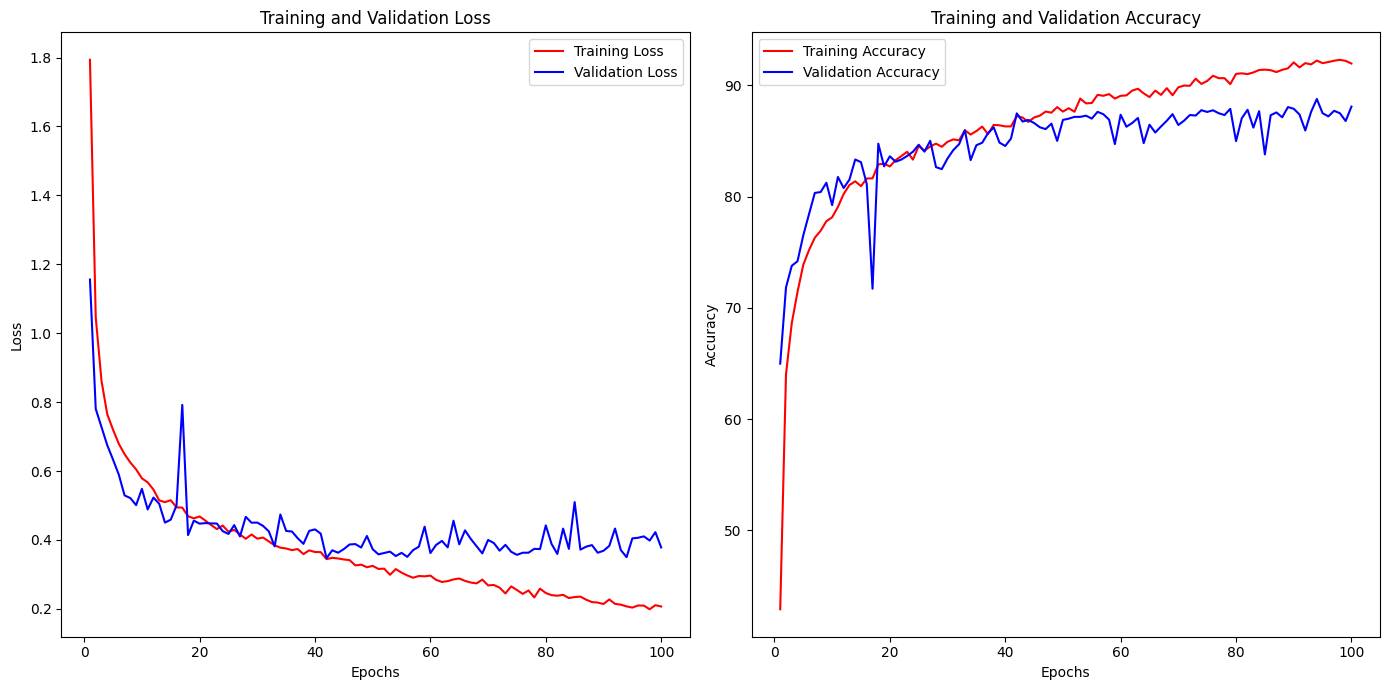

In [14]:
classifier_trainer.plot_training_history()

------------------------------------
------------------------------------

# **Test Performance**

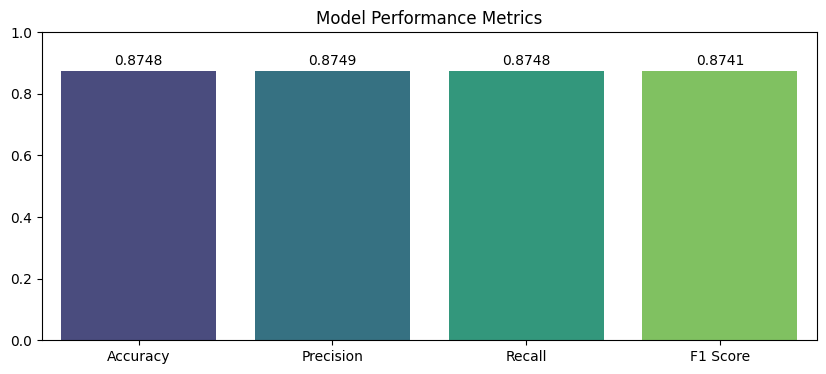

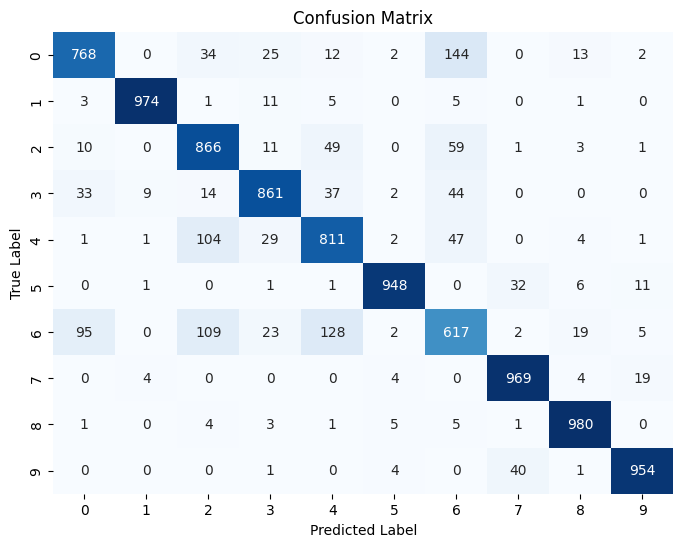

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    test_loader = DataLoader(test, batch_size=100, shuffle=True)
    classifier_trainer.testing_and_plotting(test_loader)